# **Data Modeling**

## **Lý thuyết (Theory)**

### **1. Mục đích (Objectives)**

Mục tiêu chính của giai đoạn này là xây dựng một mô hình toán học có khả năng dự đoán giá nhà dựa trên các đặc trưng (features) đã được thu thập và tiền xử lý (preprocessing). Cụ thể:

* **Dự đoán giá trị thực**: Xây dựng hệ thống ước tính giá nhà chính xác, hỗ trợ người dùng có cái nhìn tham chiếu nhanh về thị trường.
* **So sánh và lựa chọn thuật toán (Benchmarking)**: Thử nghiệm nhiều thuật toán khác nhau từ mô hình tuyến tính đơn giản (Base-line) đến các mô hình học máy nâng cao (Boosting) để tìm ra giải pháp tối ưu nhất cho tập dữ liệu.
* **Phân tích các yếu tố ảnh hưởng**: Xác định các đặc trưng quan trọng (như diện tích, vị trí, tiện ích, ...) tác động mạnh nhất đến giá thuê trọ.
* **Tối ưu hóa mô hình**: Sử dụng các kỹ thuật tinh chỉnh siêu tham số (Hyperparameter Tuning) để đạt được hiệu suất dự báo cao nhất có thể trên tập dữ liệu thực tế.



### **2. Những thuật toán Machine Learning (Algorithms Benchmark)**

* **Linear Regression (Baseline)**: Mô hình cơ sở để thiết lập mức tham chiếu ban đầu.
* **Linear Regression Optimized**: Mô hình tuyến tính đã qua xử lý đặc trưng (Feature Engineering) và tinh chỉnh tham số (Hyperparameter Tuning).
* **CatBoost Regressor**: Thuật toán Gradient Boosting mạnh mẽ, xử lý tốt các biến phân loại.
* **XGBoost Regressor**: Sử dụng cấu trúc cây quyết định (Decision Tree), tối ưu hóa tốc độ và độ chính xác thông qua cấu trúc cây quyết định.
### **3. Các chỉ số đánh giá (Evaluation Metrics)**

Để đánh giá hiệu suất của các mô hình hồi quy một cách toàn diện và khách quan, nhóm sử dụng 4 chỉ số đo lường phổ biến: $R^2$, MAE, MSE và RMSE. Việc hiểu rõ bản chất toán học của các chỉ số này giúp nhóm nhận diện chính xác mức độ sai lệch và độ tin cậy của mô hình.

#### **3.1. R-squared ($R^2$ - Hệ số xác định)**
Chỉ số này cho biết mức độ phù hợp của mô hình đối với tập dữ liệu.

* **Công thức**:
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

* **Giải thích tham số**:
  * $y_i$: Giá trị thực tế (Actual value) của căn nhà thứ $i$.
  * $\hat{y}_i$: Giá trị dự đoán (Predicted value) của căn nhà thứ $i$ từ mô hình.
  * $\bar{y}$: Giá trị trung bình (Mean) của toàn bộ giá nhà thực tế trong tập dữ liệu ($\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i$).
  * $\sum_{i=1}^{n}$: Tổng của các giá trị từ mẫu thứ 1 đến mẫu thứ $n$.
  * $(y_i - \hat{y}_i)^2$: Bình phương phần dư (Residual), đại diện cho phần biến thiên mà mô hình **không** giải thích được.
  * $(y_i - \bar{y})^2$: Bình phương độ lệch so với trung bình, đại diện cho tổng biến thiên của dữ liệu.

* **Ý nghĩa**: $R^2$ đo lường tỷ lệ phần trăm sự biến thiên của biến mục tiêu (Price) được giải thích bởi các biến đầu vào (Features). Giá trị càng gần **1.0** càng tốt.

#### **3.2. Mean Absolute Error (MAE - Sai số tuyệt đối trung bình)**
Chỉ số này đo lường độ lớn trung bình của các sai số trong tập dự đoán mà không xem xét hướng của sai số (dương hay âm).

* **Công thức**:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

* **Giải thích tham số**:
  * $n$: Tổng số lượng mẫu dữ liệu (số lượng căn nhà trong tập kiểm tra).
  * $y_i$: Giá trị thực tế của căn nhà thứ $i$.
  * $\hat{y}_i$: Giá trị dự đoán của căn nhà thứ $i$.
  * $|y_i - \hat{y}_i|$: Giá trị tuyệt đối của sai số (Absolute Error) tại điểm dữ liệu $i$. Phép trị tuyệt đối đảm bảo các sai số âm và dương không triệt tiêu lẫn nhau.

* **Ý nghĩa**: MAE cho biết trung bình mô hình dự đoán lệch bao nhiêu đơn vị tiền tệ so với thực tế. Chỉ số này ít nhạy cảm với các giá trị ngoại lai (outliers) hơn so với MSE/RMSE.

#### **3.3. Mean Squared Error (MSE - Sai số bình phương trung bình)**
Chỉ số này đo lường trung bình bình phương của các sai số.

* **Công thức**:
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

* **Giải thích tham số**:
  * $n$: Tổng số lượng mẫu dữ liệu.
  * $y_i - \hat{y}_i$: Sai số dự đoán (Residual) tại điểm dữ liệu $i$.
  * $(...)^2$: Phép bình phương. Việc bình phương có hai tác dụng: (1) loại bỏ dấu âm, và (2) khuếch đại các sai số lớn. Ví dụ: sai số gấp đôi thì MSE phạt gấp bốn lần.

* **Ý nghĩa**: MSE trừng phạt rất nặng các dự đoán sai lệch lớn, do đó nó hữu ích khi chúng ta muốn mô hình hạn chế tối đa các sai sót nghiêm trọng (outliers).

#### **3.4. Root Mean Squared Error (RMSE - Căn bậc hai sai số bình phương trung bình)**
Đây là căn bậc hai của MSE, thường được sử dụng phổ biến nhất trong báo cáo vì cùng đơn vị với biến mục tiêu.

* **Công thức**:
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

* **Giải thích tham số**:
  * $\sqrt{...}$: Căn bậc hai số học. Phép toán này đưa đơn vị của sai số (đang là "Triệu đồng bình phương" ở MSE) trở về đơn vị gốc ("Triệu đồng").
  * Các tham số còn lại ($n, y_i, \hat{y}_i$) tương tự như trong công thức MSE.

* **Ý nghĩa**: RMSE đại diện cho độ lệch chuẩn của phần dư (prediction errors). Nó cho biết mức độ phân tán của các giá trị dữ liệu quanh đường hồi quy tốt nhất. Giá trị càng thấp càng tốt.


## **Thực nghiệm (Experiments)**

### **Linear Regression - baseline**

Linear Regression (Hồi quy tuyến tính) là một trong những thuật toán học máy giám sát (supervised learning) cơ bản nhất, dùng để dự đoán một biến liên tục (biến mục tiêu) dựa trên một hoặc nhiều biến độc lập (features).

Mô hình giả định rằng mối quan hệ giữa biến mục tiêu y và các features là tuyến tính, được biểu diễn bởi công thức:

**y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε**

Trong đó:

- y là giá trị cần dự đoán,
- β₀ là hệ số chặn (intercept),
- β₁, β₂, ..., βₙ là các hệ số hồi quy (weights) biểu thị mức độ ảnh hưởng của từng feature xᵢ,
- ε là sai số ngẫu nhiên.

Mục tiêu của Linear Regression là tìm bộ hệ số β tối ưu sao cho tổng bình phương sai số (Residual Sum of Squares - RSS) giữa giá trị dự đoán và giá trị thực tế là nhỏ nhất.


#### **Import Libraries**



In [1]:
# 1. Setup môi trường notebook
%load_ext autoreload
%autoreload 2
%pip install shap ipywidgets --quiet

# 2. Standard Libraries & System
import sys
import os
import warnings

# Cấu hình tắt cảnh báo ngay từ đầu
os.environ['PYTHONWARNINGS'] = 'ignore'
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# 3. Data Manipulation & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Machine Learning & Statistics Libraries
import shap
import xgboost
from scipy.stats import loguniform, uniform
from catboost import CatBoostRegressor, Pool

# 5. Scikit-learn Components
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, RobustScaler, PowerTransformer, 
    QuantileTransformer, PolynomialFeatures
)
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, RandomizedSearchCV
)
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, 
    r2_score, mean_absolute_percentage_error
)

# 6. Custom Modules (Setup path trước khi import)
root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root not in sys.path:
    sys.path.append(root)

from utilities.modeling import *

# 7. Final Configuration & Initialization
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

results = [] # Khởi tạo biến lưu kết quả



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


#### **Load Data**


In [2]:
df = pd.read_csv("../Data/processed.csv")
df.sample()


,street_name,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,...,free_time,parking,district,month,latitude,longitude,dist_to_q1_km,district_median_price,is_hot_street,amenity_ratio
15580,Lê Thúc Hoạch,5.0,30.0,1,1,1,1,1,1,1,...,1,0,Quận Tân Phú,7,10.791868,106.627752,8.061707,3.6,0,0.909091


#### **Feature Engineering**
Để nâng cao hiệu suất của mô hình hồi quy và đảm bảo dữ liệu đầu vào đạt chất lượng tốt nhất, nhóm đã áp dụng một quy trình xử lý dữ liệu chặt chẽ bao gồm ba giai đoạn chính: Xử lý ngoại lai, Biến đổi biến mục tiêu và Kỹ thuật đặc trưng nâng cao.

##### **1. Xử lý giá trị ngoại lai (Outlier Removal)**
Dữ liệu giá nhà thường chứa các giá trị bất thường (quá thấp hoặc quá cao do lỗi nhập liệu hoặc các bất động sản siêu sang/nhà nát không đại diện cho thị trường chung). Nhóm sử dụng phương pháp **Quantile Capping** để lọc bỏ các nhiễu này:
* **Phương pháp**: Loại bỏ 1% dữ liệu có giá thấp nhất và 1% dữ liệu có giá cao nhất.
* **Ngưỡng lọc**: Chỉ giữ lại các mẫu dữ liệu nằm trong khoảng từ phân vị thứ 1 ($1^{st}$ quantile) đến phân vị thứ 99 ($99^{th}$ quantile).
* **Mục đích**: Giúp mô hình không bị lệch (bias) bởi các giá trị cực đoan, tăng độ ổn định và khả năng tổng quát hóa.

##### **2. Biến đổi biến mục tiêu (Target Transformation)**
Phân phối của giá nhà thực tế thường bị lệch phải (Right-skewed distribution), gây khó khăn cho các mô hình hồi quy tuyến tính vốn giả định dữ liệu tuân theo phân phối chuẩn.
* **Kỹ thuật**: Áp dụng biến đổi Logarit tự nhiên ($Log1p$):
  $$y_{new} = \ln(1 + y_{old})$$
* **Lợi ích**:
  * Đưa phân phối của biến mục tiêu (Price) về gần dạng phân phối chuẩn (Normal Distribution).
  * Giảm tác động của các giá trị lớn, giúp sai số dự báo ổn định hơn (giảm Heteroscedasticity).

##### **3. Kỹ thuật đặc trưng (Feature Engineering)**
Nhóm đã thực hiện chọn lọc và tạo mới các đặc trưng để cung cấp thêm thông tin ngữ nghĩa cho mô hình:

**a. Mã hóa biến phân loại (Encoding Categorical Variables)**

* **Biến xử lý**: `district` (Quận/Huyện).
* **Phương pháp**: One-Hot Encoding (với tùy chọn `drop_first=True` để tránh hiện tượng đa cộng tuyến hoàn hảo - Dummy Variable Trap).
* **Kết quả**: Chuyển đổi thông tin vị trí hành chính thành các vector nhị phân mà mô hình có thể định lượng được.

**b. Tạo đặc trưng tương tác (Interaction Features)**

Dựa trên kiến thức nghiệp vụ bất động sản, nhóm tạo ra các biến mới thể hiện sự kết hợp giữa các yếu tố:
* **`area_x_amenity_ratio`**: Tích số giữa diện tích và tỷ lệ tiện ích. Biến này đại diện cho "Chất lượng sống trên quy mô diện tích", giúp phân biệt các căn nhà lớn nhưng thiếu tiện nghi với các căn nhà lớn đầy đủ tiện nghi.
* **`log_area_x_is_hot_street`**: Biến tương tác giữa diện tích và vị trí mặt tiền (Hot street), được chuẩn hóa bằng hàm Log. Biến này giúp mô hình nắm bắt giá trị gia tăng phi tuyến tính của các bất động sản nằm ở vị trí đắc địa.

**c. Chuẩn hóa dữ liệu (Feature Scaling)**

* **Kỹ thuật**: StandardScaler (Z-score normalization).
* **Công thức**: $$x_{scaled} = \frac{x - \mu}{\sigma}$$
* **Mục đích**: Đưa tất cả các biến số về cùng một thang đo (mean=0, std=1). Bước này cực kỳ quan trọng đối với các mô hình hồi quy sử dụng Regularization (như Ridge, Lasso, ElasticNet) và giúp thuật toán tối ưu (Gradient Descent) hội tụ nhanh hơn.

In [3]:
q_low = df["price"].quantile(0.01)
q_high  = df["price"].quantile(0.99)
df = df[(df["price"] < q_high) & (df["price"] > q_low)]

y = np.log1p(df['price']) 

features_to_drop = ['price', 'street_name', 'district'] 
X = df.drop(columns=features_to_drop)

X = pd.concat([X, pd.get_dummies(df['district'], prefix='district', drop_first=True)], axis=1)

X['log_area_x_is_hot_street'] = np.log1p(X['area'] * X['is_hot_street'])
X['area_x_amenity_ratio'] = X['area'] * X['amenity_ratio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### **Train/Test Split**


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Train**


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### **Evaluate**


In [6]:
# Predict log và chuyển về giá thực
y_pred_log = lr.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test)
results.append(evaluate_metrics(y_test, y_pred, "Linear Regression"))


### **Visualize**

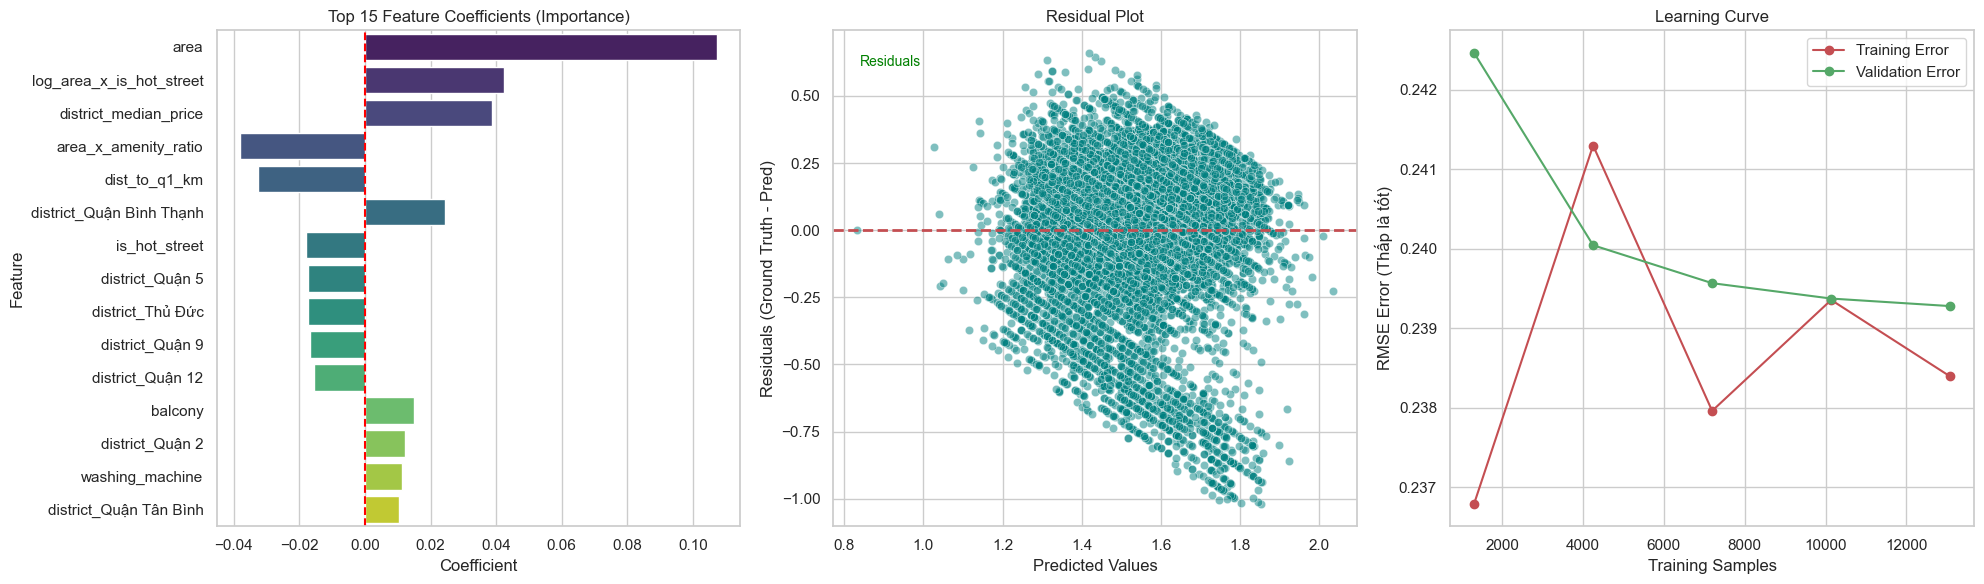

In [7]:
features = X.columns.tolist()
visualize_evaluation(lr, X_train, y_train, X_test, y_test, features)


## **Linear Expansion & Combination with Regularization**


### **Data Loading & Preprocessing Workflow**

#### **1. Làm sạch dữ liệu và Xử lý ngoại lai (Data Cleaning & Outlier Removal)**
Trước khi đưa vào mô hình, dữ liệu thô được lọc qua hai tầng để đảm bảo độ tin cậy:
* **Bộ lọc nghiệp vụ (Domain Filters)**: Loại bỏ các bất động sản có diện tích hoặc mức giá phi thực tế (ví dụ: diện tích quá nhỏ < 10m² hoặc giá quá thấp) dựa trên kiến thức về thị trường.
* **Bộ lọc thống kê (Statistical Filter)**: Sử dụng thuật toán **Isolation Forest** với tỷ lệ nhiễm bẩn (contamination) thiết lập ở mức 0.05. Đây là phương pháp học máy không giám sát giúp phát hiện và loại bỏ các điểm dữ liệu dị biệt đa chiều (multivariate outliers) mà các phương pháp lọc đơn biến truyền thống có thể bỏ sót.

#### **2. Biến đổi biến mục tiêu (Target Transformation)**
Biến mục tiêu (Giá nhà) được biến đổi bằng hàm **Logarit tự nhiên ($Log1p$)**:
$$y' = \ln(1 + y)$$
* **Mục đích**: Giảm thiểu hiện tượng lệch phân phối (skewness) của giá nhà, đưa phân phối về gần dạng chuẩn (Normal distribution) và ổn định phương sai sai số (Homoscedasticity).


In [9]:
# 1. Load Data
file_path = "../Data/processed.csv"  
try:
    df = pd.read_csv(file_path)
    print(f"[INFO] Loaded data with shape: {df.shape}")
except FileNotFoundError:
    print("[ERROR] File not found! Please check the path.")

# 2. Basic Cleaning
df['price'] = df['price'].clip(lower=1) 
df_clean = clean_and_remove_outliers(df)
print(f"Cleaned shape: {df_clean.shape}")

# 3. Train-Test Split
train_idx, test_idx = train_test_split(range(len(df_clean)), test_size=0.2, random_state=42)
df_train = df_clean.iloc[train_idx].copy()
df_test = df_clean.iloc[test_idx].copy()

# 4. Feature Engineering: Target Encoding
# Lưu ý: Map được học từ tập TRAIN và áp dụng cho cả Train & Test để tránh Data Leakage
cols_to_encode = ['street_name', 'district']
for col in cols_to_encode:
    if col in df_train.columns:
        encoding_map, global_mean = get_target_encoding_map(df_train, col, 'price', smooth=10)
        df_train[f'{col}_val'] = apply_target_encoding(df_train, col, encoding_map, global_mean)
        df_test[f'{col}_val'] = apply_target_encoding(df_test, col, encoding_map, global_mean)

# 5. Feature Engineering: Amenity Score
amenity_cols = ['air_conditioning', 'elevator', 'parking', 'fridge']
valid_amenity = [c for c in amenity_cols if c in df_train.columns]
for d in [df_train, df_test]:
    d['amenity_score'] = d[valid_amenity].sum(axis=1) if valid_amenity else 0

# 6. Final Feature Selection
FINAL_FEATURES = ['area', 'dist_to_q1_km', 'amenity_score', 'district_val']
# Kiểm tra features tồn tại
FINAL_FEATURES = [f for f in FINAL_FEATURES if f in df_train.columns]

X_train = df_train[FINAL_FEATURES].copy()
X_test = df_test[FINAL_FEATURES].copy()
y_train = np.log1p(df_train['price']) # Log transform target
y_test_real = df_test['price']

print(f"[READY] X_train shape: {X_train.shape}")


[INFO] Loaded data with shape: (20912, 22)
[CLEAN] IsolationForest removed 1045 outliers.
Cleaned shape: (19867, 22)
[READY] X_train shape: (15893, 4)


### **Pipeline Construction & RandomizedSearchCV**

Nhóm đã xây dựng một quy trình xử lý dữ liệu (Pipeline) tự động hóa và chặt chẽ, kết hợp giữa các kỹ thuật biến đổi phân phối dữ liệu nâng cao và mô hình hồi quy tuyến tính có điều chuẩn (Regularized Linear Regression). Quy trình cụ thể bao gồm các giai đoạn sau:

#### **1. Làm sạch dữ liệu và Xử lý ngoại lai (Data Cleaning & Outlier Removal)**
Trước khi đưa vào mô hình, dữ liệu thô được lọc qua hai tầng để đảm bảo độ tin cậy:
* **Bộ lọc nghiệp vụ (Domain Filters)**: Loại bỏ các bất động sản có diện tích hoặc mức giá phi thực tế (ví dụ: diện tích quá nhỏ < 10m² hoặc giá quá thấp) dựa trên kiến thức về thị trường.
* **Bộ lọc thống kê (Statistical Filter)**: Sử dụng thuật toán **Isolation Forest** với tỷ lệ nhiễm bẩn (contamination) thiết lập ở mức 0.05. Đây là phương pháp học máy không giám sát giúp phát hiện và loại bỏ các điểm dữ liệu dị biệt đa chiều (multivariate outliers) mà các phương pháp lọc đơn biến truyền thống có thể bỏ sót.

#### **2. Biến đổi biến mục tiêu (Target Transformation)**
Biến mục tiêu (Giá nhà) được biến đổi bằng hàm **Logarit tự nhiên ($Log1p$)**:
$$y' = \ln(1 + y)$$
* **Mục đích**: Giảm thiểu hiện tượng lệch phân phối (skewness) của giá nhà, đưa phân phối về gần dạng chuẩn (Normal distribution) và ổn định phương sai sai số (Homoscedasticity).

#### **3. Kỹ thuật đặc trưng (Advanced Feature Engineering)**

**a. Mã hóa biến phân loại (Target Encoding)**

Đối với các biến có độ số lượng phân loại lớn (high cardinality) như `tên đường` và `quận`, nhóm sử dụng kỹ thuật **Target Encoding** kết hợp với **Smoothing**.
* **Cơ chế**: Thay thế nhãn phân loại bằng giá trị trung bình của biến mục tiêu (giá nhà) tương ứng với nhãn đó.
* **Smoothing**: Áp dụng kỹ thuật làm trượt để tránh hiện tượng Overfitting đối với các danh mục hiếm gặp.

**b. Biến đổi đặc trưng số (Numerical Transformation)**

Sử dụng một bộ chuyển đổi tùy chỉnh (`FeatureTransformer`) được tích hợp trong quy trình tìm kiếm tham số (Grid Search) để tự động lựa chọn phương pháp biến đổi tối ưu cho từng đặc trưng:
* **Diện tích**: Thử nghiệm giữa biến đổi Logarit và Căn bậc hai.
* **Khoảng cách**: Thử nghiệm giữa Nghịch đảo ($1/x$), Logarit hoặc Phân nhóm (Binning).
* **Tiện ích**: Tính tổng điểm tiện ích và thử nghiệm các phép biến đổi phi tuyến.

**c. Tạo đặc trưng tương tác (Interaction Features)**

Nhóm sử dụng **Polynomial Features** (chỉ lấy tương tác, không lấy bậc cao) để mô hình hóa mối quan hệ cộng hưởng giữa các biến số.
* Ví dụ: Sự kết hợp giữa *Diện tích* và *Vị trí* thường tạo ra tác động giá trị lớn hơn tổng đơn lẻ của chúng.

#### **4. Chuẩn hóa và Biến đổi phân phối (Scaling & Distribution)**
Pipeline áp dụng chiến lược chuẩn hóa đa tầng để tối ưu hóa dữ liệu cho mô hình tuyến tính:

1.  **Power Transformer (Yeo-Johnson)**:
    * Áp dụng phép biến đổi Yeo-Johnson để đưa phân phối của các biến độc lập về dạng phân phối chuẩn (Gaussian-like). Điều này cực kỳ quan trọng giúp thỏa mãn giả định của hồi quy tuyến tính.
2.  **Robust Scaler**:
    * Sử dụng khoảng tứ phân vị (IQR) để chuẩn hóa dữ liệu ($Scaling$). Khác với Standard Scaler, Robust Scaler giúp giảm thiểu tác động tiêu cực của các giá trị ngoại lai còn sót lại sau bước làm sạch.

#### **5. Mô hình hóa và Tối ưu tham số (Modeling & Tuning)**

* **Thuật toán**: **ElasticNet Regression**.
    * Đây là sự kết hợp giữa hai phương pháp điều chuẩn **L1 (Lasso)** và **L2 (Ridge)**.
    * **L1** giúp loại bỏ các biến không quan trọng (Feature Selection).
    * **L2** giúp giảm thiểu hiện tượng đa cộng tuyến (Multicollinearity) và tránh Overfitting.

* **Tối ưu hóa (Hyperparameter Tuning)**:
    * Sử dụng **RandomizedSearchCV** với 100 vòng lặp.
    * **Không gian tìm kiếm**: Tinh chỉnh đồng thời các chiến lược Feature Engineering (cách xử lý diện tích, khoảng cách) và các tham số của mô hình ($\alpha$, $l1\_ratio$).
    * **Metric đánh giá**: Tối ưu hóa chỉ số $R^2$ trên tập kiểm định chéo (Cross-validation 5-fold).

In [10]:
# 1. Define Pipeline
pipeline = Pipeline([
    ('feat_eng', FeatureTransformer()),

    ('transformer', PowerTransformer(method='yeo-johnson')),

    ('scaler', RobustScaler()),

    ('poly', PolynomialFeatures(
        interaction_only=True,
        include_bias=False
    )),

    ('model', ElasticNet(
        max_iter=10000,
        tol=1e-3
    ))
])

pipeline.set_output(transform="pandas")


# Kích hoạt output Pandas để giữ tên cột
pipeline.set_output(transform="pandas")

# 2. Define Hyperparameter Space
param_distributions = {
    'feat_eng__area_strategy': ['log', 'sqrt'],
    'feat_eng__dist_strategy': ['inv', 'bin'],
    'feat_eng__score_strategy': ['log', 'none'],
    
    # ElasticNet params
    'model__alpha': loguniform(1e-4, 1.0),       # Alpha: Độ mạnh của regularization
    'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.99] # L1 Ratio: Cân bằng giữa Lasso và Ridge
}

# 3. Run RandomizedSearchCV
print("\n[RUNNING] RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train, y_train)
print(f"Best Params: {random_search.best_params_}")



[RUNNING] RandomizedSearchCV...
Best Params: {'feat_eng__area_strategy': 'sqrt', 'feat_eng__dist_strategy': 'inv', 'feat_eng__score_strategy': 'log', 'model__alpha': np.float64(0.00013924162890248685), 'model__l1_ratio': 0.1}


### **Evaluation & Visualization**
Mục đích: Đánh giá hiệu suất mô hình trên tập Test và trực quan hóa các đặc trưng quan trọng nhất.

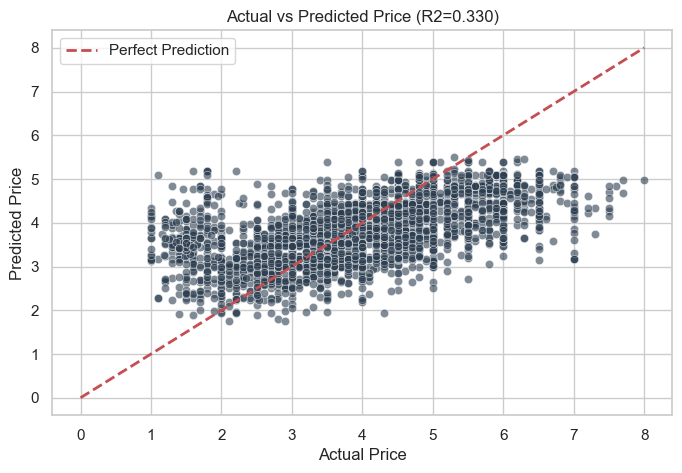

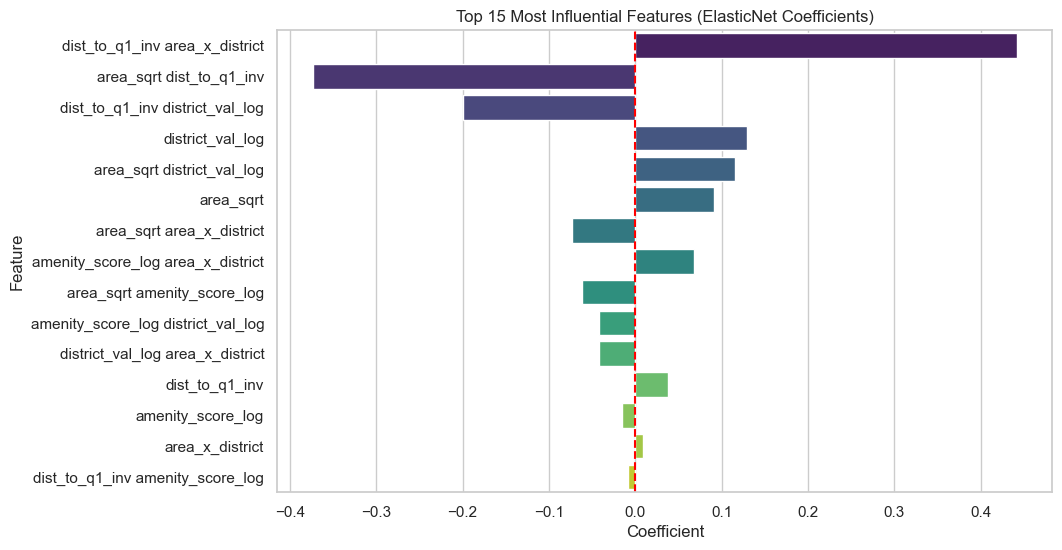

In [11]:
best_model = random_search.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log) # Chuyển ngược từ log về giá thực

results.append(evaluate_metrics(y_test_real, y_pred, "Linear Regression Optimized"))

r2 = r2_score(y_test_real, y_pred)
mae = mean_absolute_error(y_test_real, y_pred)
mape = mean_absolute_percentage_error(y_test_real, y_pred)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_real, y=y_pred, alpha=0.6, color='#2c3e50')
plt.plot([0, y_test_real.max()], [0, y_test_real.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.title(f'Actual vs Predicted Price (R2={r2:.3f})')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Lấy tên features sau khi đi qua pipeline pre-processing
preprocessor = Pipeline(best_model.steps[:-1])
final_model_step = best_model.named_steps['model']
X_test_transformed = preprocessor.transform(X_test)
feature_names = X_test_transformed.columns.tolist()

if hasattr(final_model_step, 'coef_'):
    coefs = final_model_step.coef_
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefs,
        'Abs_Coef': np.abs(coefs)
    }).sort_values(by='Abs_Coef', ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
    plt.title("Top 15 Most Influential Features (ElasticNet Coefficients)")
    plt.axvline(x=0, color='red', linestyle='--')
    plt.show()


## **XGBoost**

XGBoost (Extreme Gradient Boosting) là một thuật toán học máy dựa trên phương pháp Gradient Boosting, được thiết kế để tối ưu hóa hiệu suất và độ chính xác. Nó sử dụng các cây quyết định (decision trees) làm các mô hình cơ sở (base learners), và kết hợp chúng theo cách tăng dần để tạo ra một mô hình mạnh mẽ.

Ưu điểm của XGBoost:

1. **Tăng tốc độ huấn luyện:** Sử dụng kỹ thuật phân tích song song và tối ưu hóa bộ nhớ.
2. **Độ chính xác cao:** Kết hợp nhiều mô hình yếu để tạo ra một mô hình mạnh.
3. **Xử lý dữ liệu thiếu:** Có thể xử lý dữ liệu thiếu một cách tự động.
4. **Regularization:** Áp dụng L1 và L2 regularization để giảm overfitting.

Các tham số quan trọng trong XGBoost:

- `n_estimators`: Số lượng cây quyết định.
- `max_depth`: Độ sâu tối đa của mỗi cây.
- `learning_rate`: Tốc độ học của mô hình.
- `subsample`: Tỷ lệ mẫu được sử dụng trong mỗi vòng lặp huấn luyện.

Mô hình XGBoost có thể được sử dụng cho cả bài toán hồi quy và phân loại, với khả năng xử lý dữ liệu lớn và phức tạp một cách hiệu quả.

<!-- # **Chiến lược Xây dựng Pipeline Học Máy (Machine Learning Pipeline Strategy)**

Để giải quyết bài toán dự đoán giá nhà với dữ liệu phức tạp, nhóm đã xây dựng một Pipeline xử lý dữ liệu và huấn luyện mô hình toàn diện. Pipeline này được thiết kế để tự động hóa quy trình từ làm sạch dữ liệu đến tối ưu hóa siêu tham số, đảm bảo tính nhất quán và khả năng tái lập kết quả. -->

#### **1. Tổng quan Quy trình (Pipeline Overview)**

Pipeline bao gồm 5 giai đoạn chính được thực hiện tuần tự:

1.  **Làm sạch dữ liệu nâng cao (Robust Outlier Removal)**: Loại bỏ các giá trị nhiễu theo từng phân nhóm.
2.  **Sinh biến số nâng cao (Massive Feature Engineering)**: Tạo ra các đặc trưng mới dựa trên kiến thức toán học và nghiệp vụ.
3.  **Chia tập dữ liệu (Data Splitting)**: Tách biệt tập Train/Test để đảm bảo đánh giá khách quan.
4.  **Mã hóa biến mục tiêu (K-Fold Target Encoding)**: Xử lý các biến phân loại có độ phân tán cao.
5.  **Tối ưu hóa mô hình (Model Tuning)**: Sử dụng Grid Search để tìm bộ tham số tối ưu cho XGBoost.


#### **2. Chi tiết từng giai đoạn (Stage-by-Stage Breakdown)**

##### **Giai đoạn 1: Làm sạch dữ liệu (Robust Outlier Removal)**
Thay vì loại bỏ ngoại lai trên toàn bộ tập dữ liệu (có thể làm mất thông tin của các quận đắt đỏ), nhóm áp dụng kỹ thuật lọc cục bộ:
* **Phương pháp**: `Robust Group-based Filtering`.
* **Cơ chế**: Nhóm dữ liệu theo từng `district` (Quận). Trong mỗi quận, chỉ giữ lại các căn nhà có mức giá nằm trong khoảng phân vị từ **5% đến 95%** ($5^{th} - 95^{th}$ percentile).
* **Lợi ích**: Giữ lại được các căn nhà giá cao ở quận trung tâm (như Quận 1) nhưng vẫn loại bỏ được các tin đăng sai giá (spam/error) trong cùng khu vực đó.

##### **Giai đoạn 2: Sinh biến số nâng cao (Massive Feature Engineering)**
Đây là bước đột phá giúp mô hình học được các mối quan hệ phi tuyến tính phức tạp:

* **A. Biến tiện ích (Amenity Scoring)**:
    * Tổng hợp các cột tiện ích rời rạc (`elevator`, `pool`, `parking`...) thành một chỉ số duy nhất: `amenity_score`.
* **B. Biến đổi toán học (Mathematical Transforms)**:
    * **Logarit ($Log1p$)**: Áp dụng cho Diện tích và Khoảng cách để giảm độ lệch (skewness) của phân phối (`area_log`, `dist_log`).
    * **Căn bậc hai ($Sqrt$)**: `area_sqrt`.
    * **Nghịch đảo ($Inverse$)**: `dist_inv = 1 / (dist + 0.1)`. Biến này đại diện cho "Độ gần trung tâm" (giá trị càng lớn càng tốt), giúp mô hình dễ học hơn so với khoảng cách.
* **C. Biến tương tác (Interaction Features) - Quan trọng nhất**:
    * `amenity_density`: Mật độ tiện ích trên một mét vuông.
    * `area_x_dist_inv`: Tích số giữa Diện tích và Độ gần trung tâm. Đây là chỉ số "Vàng" vì những căn nhà vừa to vừa gần trung tâm sẽ có giá trị cực đại.

##### **Giai đoạn 3: Chia tập dữ liệu (Data Splitting)**
* **Tỷ lệ**: 80% Train - 20% Test.
* **Random State**: 42 (Cố định để đảm bảo kết quả có thể tái lập).
* **Lưu ý**: Việc chia dữ liệu được thực hiện **trước** bước Encoding để tránh hiện tượng rò rỉ dữ liệu (Data Leakage).

##### **Giai đoạn 4: Mã hóa biến mục tiêu (K-Fold Target Encoding)**
Các biến phân loại như `district` và `street_name` có rất nhiều giá trị (high cardinality). One-Hot Encoding sẽ tạo ra quá nhiều cột (sparse matrix). Nhóm sử dụng kỹ thuật **K-Fold Target Encoding**:
* **Cơ chế**: Thay thế tên đường/quận bằng giá trung bình của các căn nhà tại đó.
* **Kỹ thuật K-Fold**: Chia tập Train thành 5 phần (folds). Giá trị thay thế cho một mẫu (sample) được tính từ 4 phần còn lại. Điều này ngăn chặn mô hình "nhớ" đáp án (Overfitting).
* **Smoothing**: Áp dụng làm trượt để xử lý các con đường có ít dữ liệu.

##### **Giai đoạn 5: Mô hình hóa & Tối ưu tham số (Grid Search with XGBoost)**
* **Mô hình**: **XGBoost Regressor** (eXtreme Gradient Boosting).
* **Biến mục tiêu**: $Log1p(Price)$ - Dự đoán log của giá để ổn định sai số.
* **Chiến lược tối ưu**: **GridSearchCV** (Duyệt lưới toàn bộ).
    * Duyệt qua tất cả các tổ hợp tham số quan trọng: `learning_rate`, `max_depth`, `n_estimators`, `subsample`, `colsample_bytree`.
    * **Cross-Validation**: 3-Fold. Đảm bảo bộ tham số tìm được hoạt động tốt trên nhiều tập con dữ liệu khác nhau.
    * **Scoring Metric**: $R^2$ (Hệ số xác định).

<!-- --- -->

#### **3. Tổng kết Chiến lược (Strategy Summary)**

| Giai đoạn | Kỹ thuật chính | Mục đích |
| :--- | :--- | :--- |
| **Cleaning** | Group-based Quantile Clipping | Loại bỏ nhiễu cục bộ theo từng khu vực. |
| **Feature Eng** | Log/Sqrt/Inverse Transform & Interactions | Bắt các mối quan hệ phi tuyến và tương tác đa biến. |
| **Encoding** | K-Fold Target Encoding | Xử lý biến phân loại nhiều giá trị mà không gây Overfitting. |
| **Modeling** | XGBoost + GridSearchCV | Tìm kiếm cấu hình mô hình tối ưu nhất một cách vét cạn. |

In [13]:
try:
    df = pd.read_csv('../Data/processed.csv')
except:
    df = pd.DataFrame({'price': np.random.randint(2, 10, 500),'area': np.random.randint(20, 100, 500),'district': np.random.choice(['Q1', 'Q2', 'Q3'], 500),'street_name': np.random.choice(['Duong A', 'Duong B', 'Duong C'], 500),'dist_to_q1_km': np.random.uniform(1, 15, 500),'air_conditioning': np.random.randint(0, 2, 500)})

df_clean = robust_outlier_removal(df)

# --- MASSIVE FEATURE ENGINEERING ---
df_clean = create_massive_features(df_clean)

# --- SPLIT ---
train_idx, test_idx = train_test_split(range(len(df_clean)), test_size=0.2, random_state=42)
df_train = df_clean.iloc[train_idx].copy().reset_index(drop=True)
df_test = df_clean.iloc[test_idx].copy().reset_index(drop=True)

# --- ENCODING ---
encoder_dist = KFoldTargetEncoder('district', 'price')
df_train = encoder_dist.fit_transform(df_train)
df_test = encoder_dist.transform(df_test)

encoder_street = KFoldTargetEncoder('street_name', 'price')
df_train = encoder_street.fit_transform(df_train)
df_test = encoder_street.transform(df_test)

# --- SELECT FEATURES ---
# Chọn tất cả các cột số (trừ price và các cột string)
exclude = ['price', 'district', 'street_name', 'price_per_m2', 'description']
features = [c for c in df_train.columns if c not in exclude and df_train[c].dtype in ['float64', 'int64']]

print(f"Tổng số features sử dụng: {len(features)}")
print(f"Features: {features}")

X_train = df_train[features]
X_test = df_test[features]
y_train = np.log1p(df_train['price'])
y_test_real = df_test['price']


Tổng số features sử dụng: 29
Features: ['area', 'air_conditioning', 'fridge', 'washing_machine', 'mezzanine', 'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator', 'free_time', 'parking', 'month', 'latitude', 'longitude', 'dist_to_q1_km', 'district_median_price', 'is_hot_street', 'amenity_ratio', 'amenity_score', 'area_log', 'dist_log', 'area_sqrt', 'dist_inv', 'amenity_density', 'area_x_dist_inv', 'area_x_amenity', 'district_kfold_val', 'street_name_kfold_val']


### **Giải thích Cấu hình Tham số Mô hình (Hyperparameter Configuration)**

Để tối ưu hóa hiệu suất của thuật toán XGBoost (eXtreme Gradient Boosting), nhóm sử dụng kỹ thuật **Grid Search** (Duyệt lưới) để tìm kiếm bộ tham số tốt nhất. Dưới đây là ý nghĩa chi tiết của từng tham số được thiết lập trong không gian tìm kiếm (`param_grid`):

#### **1. Tham số của bộ Boosting (Boosting Parameters)**

* **`n_estimators`**: `[1000, 1500]`
    * **Ý nghĩa**: Số lượng cây quyết định (decision trees) được xây dựng trong quá trình boosting.
    * **Giải thích**: Số lượng cây càng lớn, mô hình càng có khả năng học được các mẫu phức tạp. Tuy nhiên, nếu quá lớn sẽ gây ra hiện tượng *Overfitting* (học vẹt) và tăng thời gian huấn luyện. Nhóm thử nghiệm mức 1000 và 1500 để đảm bảo đủ độ sâu học tập.

* **`learning_rate` (eta)**: `[0.01, 0.05, 0.1]`
    * **Ý nghĩa**: Hệ số co (shrinkage) đóng góp của mỗi cây vào kết quả cuối cùng.
    * **Giải thích**:
        * Giá trị thấp (0.01): Mô hình học chậm hơn nhưng thường đạt kết quả tổng quát hóa tốt hơn (robust), yêu cầu số lượng cây (`n_estimators`) lớn.
        * Giá trị cao (0.1): Mô hình hội tụ nhanh hơn nhưng dễ bỏ qua điểm tối ưu toàn cục.
    * **Chiến lược**: Nhóm thử nghiệm cả tốc độ chậm và trung bình để tìm điểm cân bằng giữa độ chính xác và tốc độ hội tụ.

#### **2. Tham số cấu trúc cây (Tree Parameters)**

* **`max_depth`**: `[5, 7]`
    * **Ý nghĩa**: Độ sâu tối đa của mỗi cây quyết định.
    * **Giải thích**: Kiểm soát độ phức tạp của mô hình.
        * Độ sâu thấp: Mô hình đơn giản, dễ bị *Underfitting*.
        * Độ sâu cao: Mô hình phức tạp, bắt được các nhiễu (noise) của dữ liệu, dễ dẫn đến *Overfitting*.
    * **Lựa chọn**: Giá trị 5-7 là mức trung bình thường hoạt động hiệu quả cho dữ liệu dạng bảng (tabular data).

* **`colsample_bytree`**: `[0.7, 0.8]`
    * **Ý nghĩa**: Tỷ lệ phần trăm số lượng đặc trưng (features) được chọn ngẫu nhiên để xây dựng mỗi cây.
    * **Giải thích**: Tương tự như Random Forest, việc không dùng tất cả các cột cho mỗi cây giúp giảm phương sai (variance) và ngăn mô hình quá phụ thuộc vào một vài đặc trưng mạnh, giúp giảm overfitting.

* **`subsample`**: `[0.7, 0.8]`
    * **Ý nghĩa**: Tỷ lệ phần trăm dữ liệu huấn luyện (hàng/rows) được lấy mẫu ngẫu nhiên để xây dựng mỗi cây.
    * **Giải thích**: Sử dụng một phần dữ liệu (Stochastic Gradient Boosting) giúp thuật toán chạy nhanh hơn và ngăn chặn việc học vẹt trên toàn bộ tập dữ liệu.

#### **3. Tham số hệ thống & Mục tiêu (System & Objective Params)**

* **`objective`**: `['reg:squarederror']`
    * **Ý nghĩa**: Hàm mất mát (Loss Function) cần tối ưu hóa.
    * **Giải thích**: Sử dụng hàm bình phương sai số (Mean Squared Error) - chuẩn mực cho các bài toán hồi quy (Regression) để giảm thiểu chênh lệch giữa giá dự đoán và giá thực tế.

* **`tree_method`**: `['hist']`
    * **Ý nghĩa**: Thuật toán xây dựng cây.
    * **Giải thích**: Sử dụng phương pháp dựa trên biểu đồ tần suất (Histogram-based). Phương pháp này gom nhóm các giá trị liên tục vào các bin rời rạc, giúp tăng tốc độ huấn luyện đáng kể trên tập dữ liệu lớn mà ít ảnh hưởng đến độ chính xác.

* **`n_jobs`**: `[-1]`
    * **Ý nghĩa**: Số luồng CPU sử dụng.
    * **Giải thích**: Giá trị `-1` chỉ định sử dụng tất cả các nhân (cores) của CPU hiện có để huấn luyện song song, giúp tối đa hóa tốc độ xử lý.

<!-- --- -->

#### **4. Cấu hình Grid Search (Grid Search Strategy)**

* **`cv=3` (Cross-Validation)**:
    * Quá trình tìm kiếm sử dụng kiểm định chéo 3 lần (3-fold cross-validation). Dữ liệu huấn luyện được chia làm 3 phần, mô hình sẽ huấn luyện trên 2 phần và kiểm thử trên 1 phần, lặp lại 3 lần để đảm bảo kết quả đánh giá là khách quan và ổn định.

* **`scoring='r2'`**:
    * Sử dụng chỉ số $R^2$ (Hệ số xác định) làm tiêu chí duy nhất để so sánh và chọn ra bộ tham số tốt nhất. Bộ tham số nào cho $R^2$ trung bình trên 3 lần CV cao nhất sẽ được chọn làm `best_params_`.

In [14]:
# Định nghĩa lưới tham số (Grid)
# Lưu ý: Grid Search chạy rất lâu vì thuật toán thử TẤT CẢ tổ hợp. 
# Ví dụ: 3 learning_rate * 2 max_depth * 2 subsample * 2 colsample = 24 lần chạy train full.
param_grid = {
    'n_estimators': [1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    # Cố định các tham số khác
    'n_jobs': [-1],
    'random_state': [42],
    'objective': ['reg:squarederror'],
    'tree_method': ['hist'] # Tăng tốc
}

xgb = xgboost.XGBRegressor()

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=3,         
    verbose=1,
    n_jobs=-1     
)

grid_search.fit(X_train, y_train)

print("\n" + "="*40)
print(f" Best Params: {grid_search.best_params_}")
print(f" Best CV R2: {grid_search.best_score_:.4f}")
print("="*40)


Fitting 3 folds for each of 48 candidates, totalling 144 fits

 Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 42, 'subsample': 0.7, 'tree_method': 'hist'}
 Best CV R2: 0.4740


In [15]:
best_model = grid_search.best_estimator_

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

results.append(evaluate_metrics(df_test['price'], y_pred, "XGBoost Regressor"))
print(results)


[{'Model': 'Linear Regression', 'R2': 0.27903462433945536, 'MAE (Triệu VND)': 0.8071671687422597, 'MSE': 1.1241651050034753, 'RMSE': np.float64(1.0602665254564416)}, {'Model': 'Linear Regression Optimized', 'R2': 0.33006386044254676, 'MAE (Triệu VND)': 0.7674479329543106, 'MSE': 1.033871905792949, 'RMSE': np.float64(1.0167949182568474)}, {'Model': 'XGBoost Regressor', 'R2': 0.5034560186188326, 'MAE (Triệu VND)': 0.6131926184553094, 'MSE': 0.6410185957786592, 'RMSE': np.float64(0.8006363692580166)}]


### **Evaluate**
Đánh giá hiệu suất mô hình trên tập Test và trực quan hóa các đặc trưng quan trọng nhất.

 Đang retrain mô hình với Best Params để lấy lịch sử Loss...


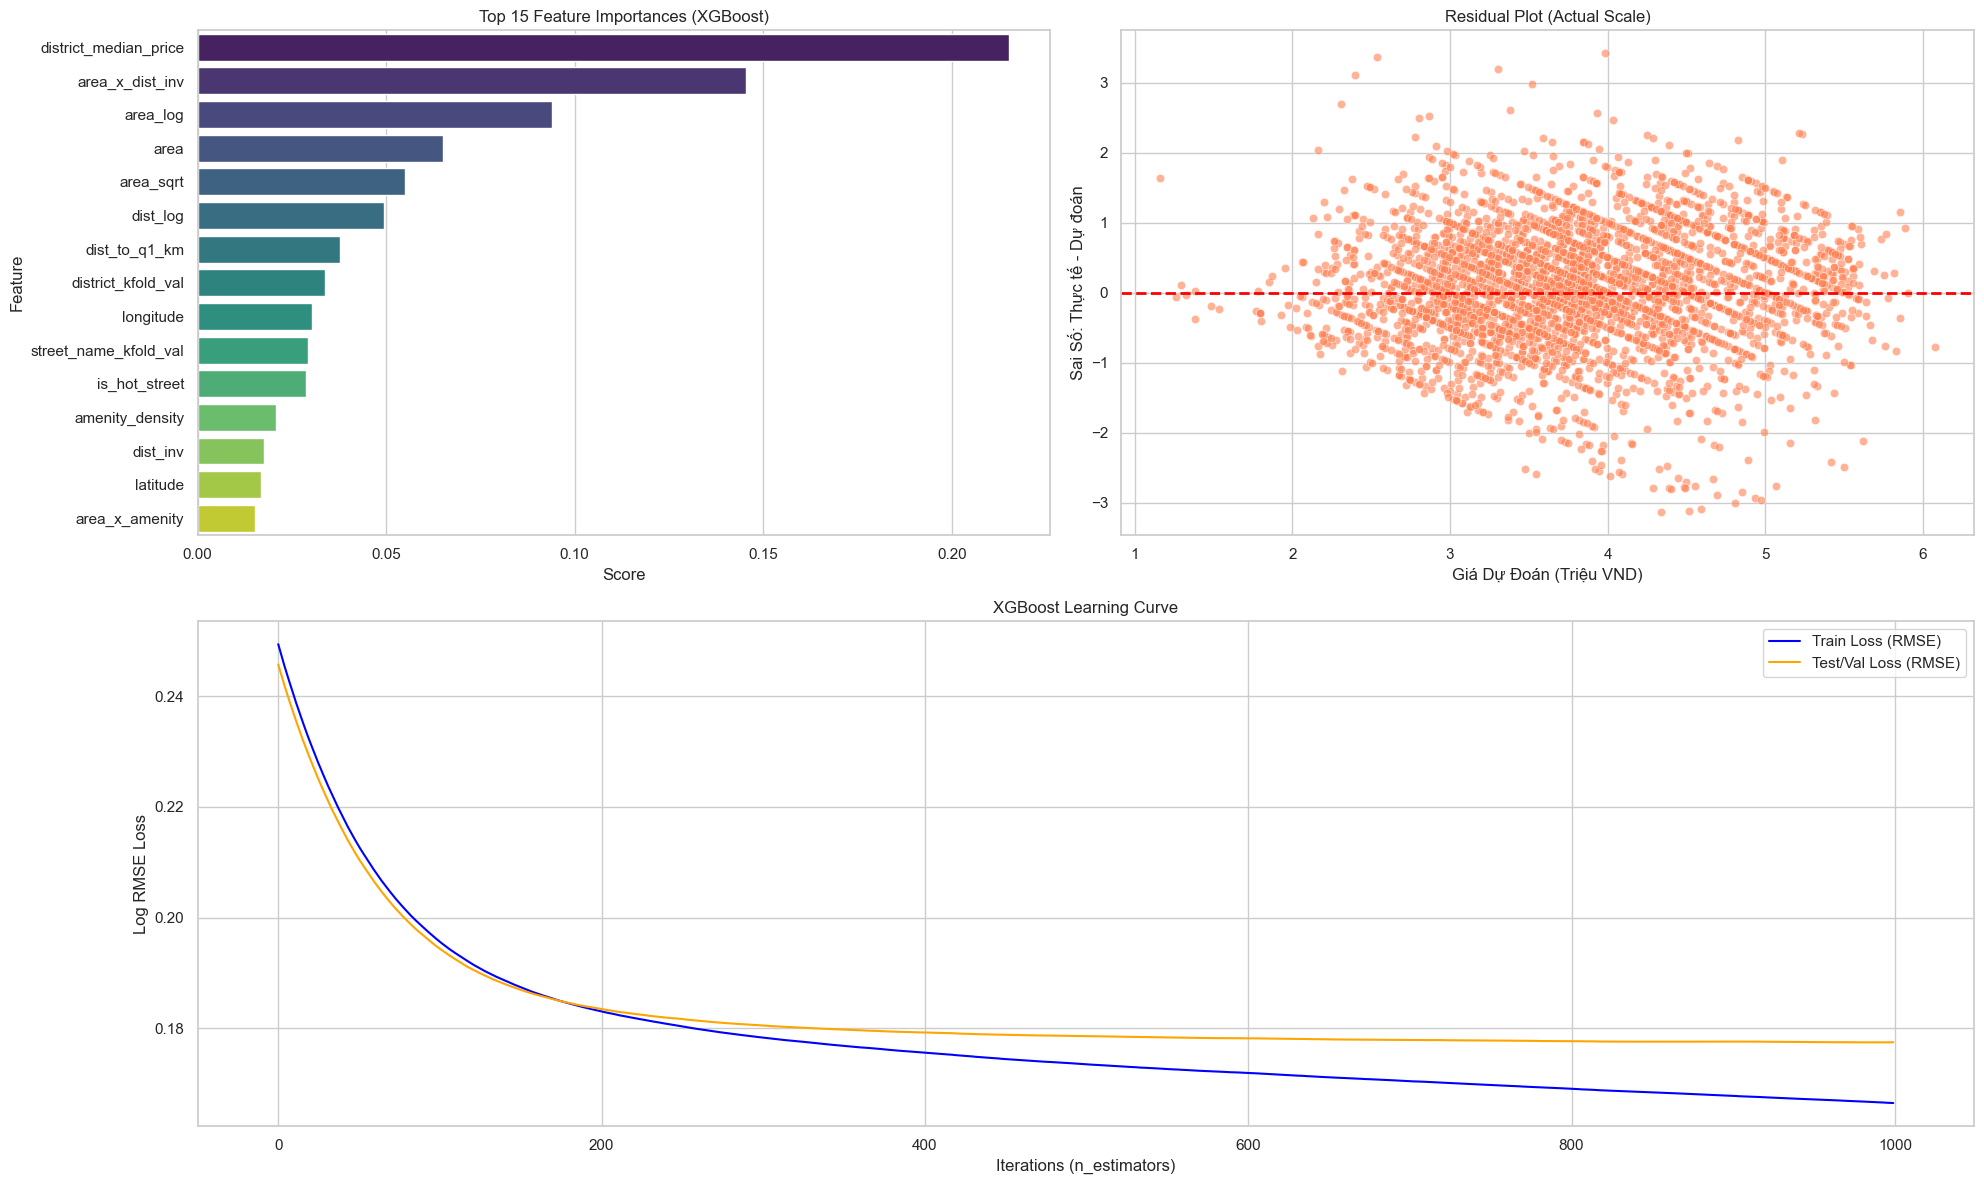

In [16]:
# Lưu ý: df_test['price'] chính là y_test thực tế (chưa log)
plot_xgboost_analysis(grid_search, X_train, y_train, X_test, df_test['price'])


## **CatBoost**
CatBoost(Categorical Boosting) là thuật toán học máy dựa trên phương pháp Gradient Boosting, nổi bật với khả năng xử lý dữ liệu phân loại (categorical data) một cách hiệu quả và giảm thiểu overfitting thông qua các kỹ thuật đặc biệt.


### **Load Data**
Tải dữ liệu từ file CSV.

In [18]:
df = pd.read_csv("../Data/processed.csv")
df.sample()


,street_name,price,area,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,...,free_time,parking,district,month,latitude,longitude,dist_to_q1_km,district_median_price,is_hot_street,amenity_ratio
18814,Quốc Lộ,1.5,30.0,1,1,1,1,1,1,1,...,1,1,Thủ Đức,3,10.851024,106.754895,10.35199,3.0,0,1.0


### **Remove Outliers**
Loại bỏ các giá trị ngoại lai (outliers) trong tập dữ liệu để cải thiện độ chính xác của mô hình.

In [19]:
q_low = df["price"].quantile(0.05)
# q_high = df["price"].quantile(0.95)

df = df[(df["price"] > q_low) & (df["price"] < 20)]           

X = df.drop(columns=["price"])
y = df['price']    
categorical_features = ['street_name', 'district', 'month']


### **Train/Validation/Test Split**
Chia dữ liệu thành ba tập: Train (70%), Validation (15%), và Test (15%).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)


X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, 
    test_size=0.5, 
    random_state=42
)

print(f"1. Tập Train (Huấn luyện): {X_train.shape[0]} dòng")
print(f"2. Tập Val (Tinh chỉnh/Early Stop): {X_val.shape[0]} dòng")
print(f"3. Tập Test (Chấm điểm độc lập): {X_test.shape[0]} dòng")


1. Tập Train (Huấn luyện): 13897 dòng
2. Tập Val (Tinh chỉnh/Early Stop): 2978 dòng
3. Tập Test (Chấm điểm độc lập): 2978 dòng


### **Model config & training**
Cấu hình và huấn luyện mô hình CatBoost
<!-- ```python
cat = CatBoostRegressor(
    iterations=5000,           
    learning_rate=0.05,        
    depth=7,                   
    loss_function='RMSE',      
    eval_metric='R2',        
    random_seed=42,
    verbose=100         ,
    allow_writing_files=False    
)

cat.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_val, y_val), 
    early_stopping_rounds=100,
    plot=True
)
``` -->
Giải thích parameters:
- `iterations=5000`: Số vòng lặp huấn luyện.
- `learning_rate=0.05`: Tốc độ học. 
- `depth=7`: Độ sâu tối đa của cây quyết định.
- `loss_function='RMSE'`: Hàm mất mát sử dụng trong huấn luyện.
- `eval_metric='R2'`: Thước đo hiệu suất để đánh giá mô hình.
- `random_seed=42`: Hạt giống ngẫu nhiên để đảm bảo tính tái lập.
- `verbose=100`: In thông tin huấn luyện sau mỗi 100 vòng lặp.
- `allow_writing_files=False`: Ngăn việc ghi file trong quá trình huấn luyện.
- `cat.fit(...)`: Huấn luyện mô hình với tập huấn luyện và tập validation, sử dụng các đặc trưng phân loại và dừng sớm nếu không cải thiện sau 100 vòng lặp.

In [21]:
cat = CatBoostRegressor(
    iterations=5000,           
    learning_rate=0.05,        
    depth=7,                   
    loss_function='RMSE',      
    eval_metric='R2',        
    random_seed=42,
    verbose=100         ,
    allow_writing_files=False    
)

cat.fit(
    X_train, y_train,
    cat_features=categorical_features,
    eval_set=(X_val, y_val), 
    early_stopping_rounds=100,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0354111	test: 0.0349952	best: 0.0349952 (0)	total: 199ms	remaining: 16m 32s
100:	learn: 0.4397797	test: 0.4214474	best: 0.4214641 (99)	total: 6.08s	remaining: 4m 55s
200:	learn: 0.4719198	test: 0.4278995	best: 0.4280511 (198)	total: 12.1s	remaining: 4m 48s
300:	learn: 0.4945138	test: 0.4289143	best: 0.4292490 (280)	total: 17.1s	remaining: 4m 26s
400:	learn: 0.5126808	test: 0.4297533	best: 0.4300448 (368)	total: 21.8s	remaining: 4m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.4300447633
bestIteration = 368

Shrink model to first 369 iterations.


### **Evaluation**
Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập Test.

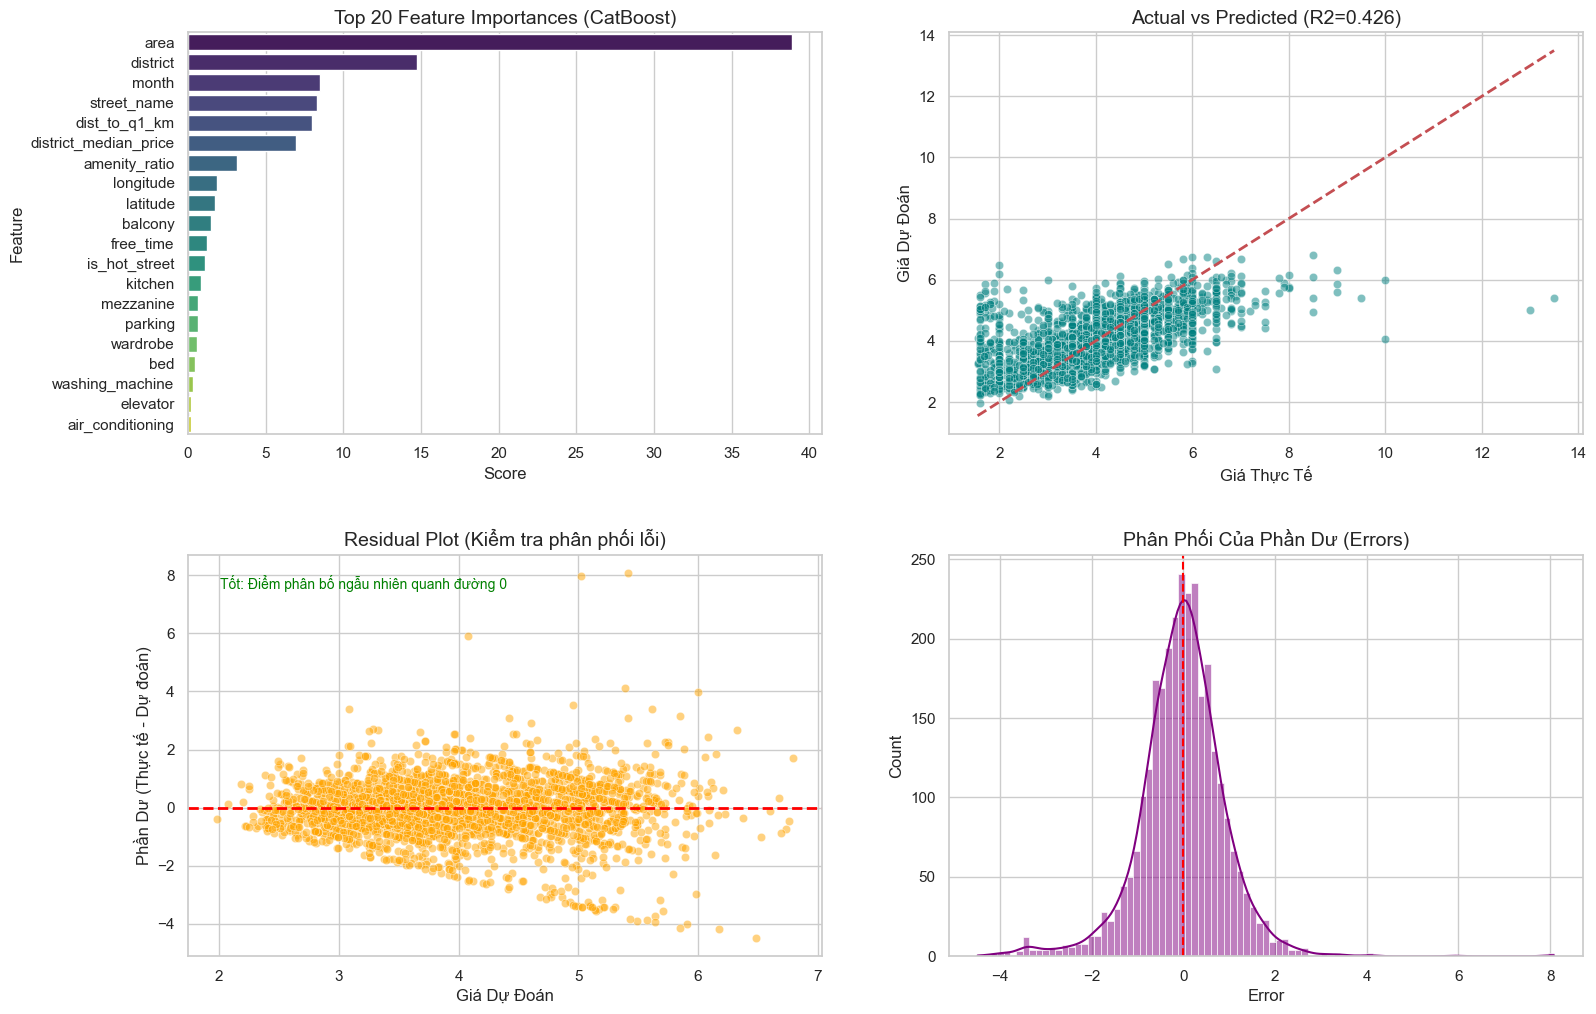

In [22]:
y_pred = cat.predict(X_test)
results.append(evaluate_metrics(y_test, y_pred, "CatBoost Regressor"))

# Gọi hàm vẽ
plot_catboost_evaluation(cat, X_train, y_test, y_pred)


## **So sánh và Đánh giá (Comparision & Analysis)**

In [23]:
results


[{'Model': 'Linear Regression',
  'R2': 0.27903462433945536,
  'MAE (Triệu VND)': 0.8071671687422597,
  'MSE': 1.1241651050034753,
  'RMSE': np.float64(1.0602665254564416)},
 {'Model': 'Linear Regression Optimized',
  'R2': 0.33006386044254676,
  'MAE (Triệu VND)': 0.7674479329543106,
  'MSE': 1.033871905792949,
  'RMSE': np.float64(1.0167949182568474)},
 {'Model': 'XGBoost Regressor',
  'R2': 0.5034560186188326,
  'MAE (Triệu VND)': 0.6131926184553094,
  'MSE': 0.6410185957786592,
  'RMSE': np.float64(0.8006363692580166)},
 {'Model': 'CatBoost Regressor',
  'R2': 0.4264127801847082,
  'MAE (Triệu VND)': 0.675375757027107,
  'MSE': 0.9001693134516036,
  'RMSE': np.float64(0.9487725298782652)}]

In [24]:
df_results = pd.DataFrame(results)

# Loại bỏ các dòng trùng lặp (nếu có)
df_results = df_results.drop_duplicates(subset=['Model', 'R2'])

df_results = df_results.sort_values(by='R2', ascending=False).reset_index(drop=True)

# Hiển thị bảng
display(df_results)


,Model,R2,MAE (Triệu VND),MSE,RMSE
0,XGBoost Regressor,0.503456,0.613193,0.641019,0.800636
1,CatBoost Regressor,0.426413,0.675376,0.900169,0.948773
2,Linear Regression Optimized,0.330064,0.767448,1.033872,1.016795
3,Linear Regression,0.279035,0.807167,1.124165,1.060267


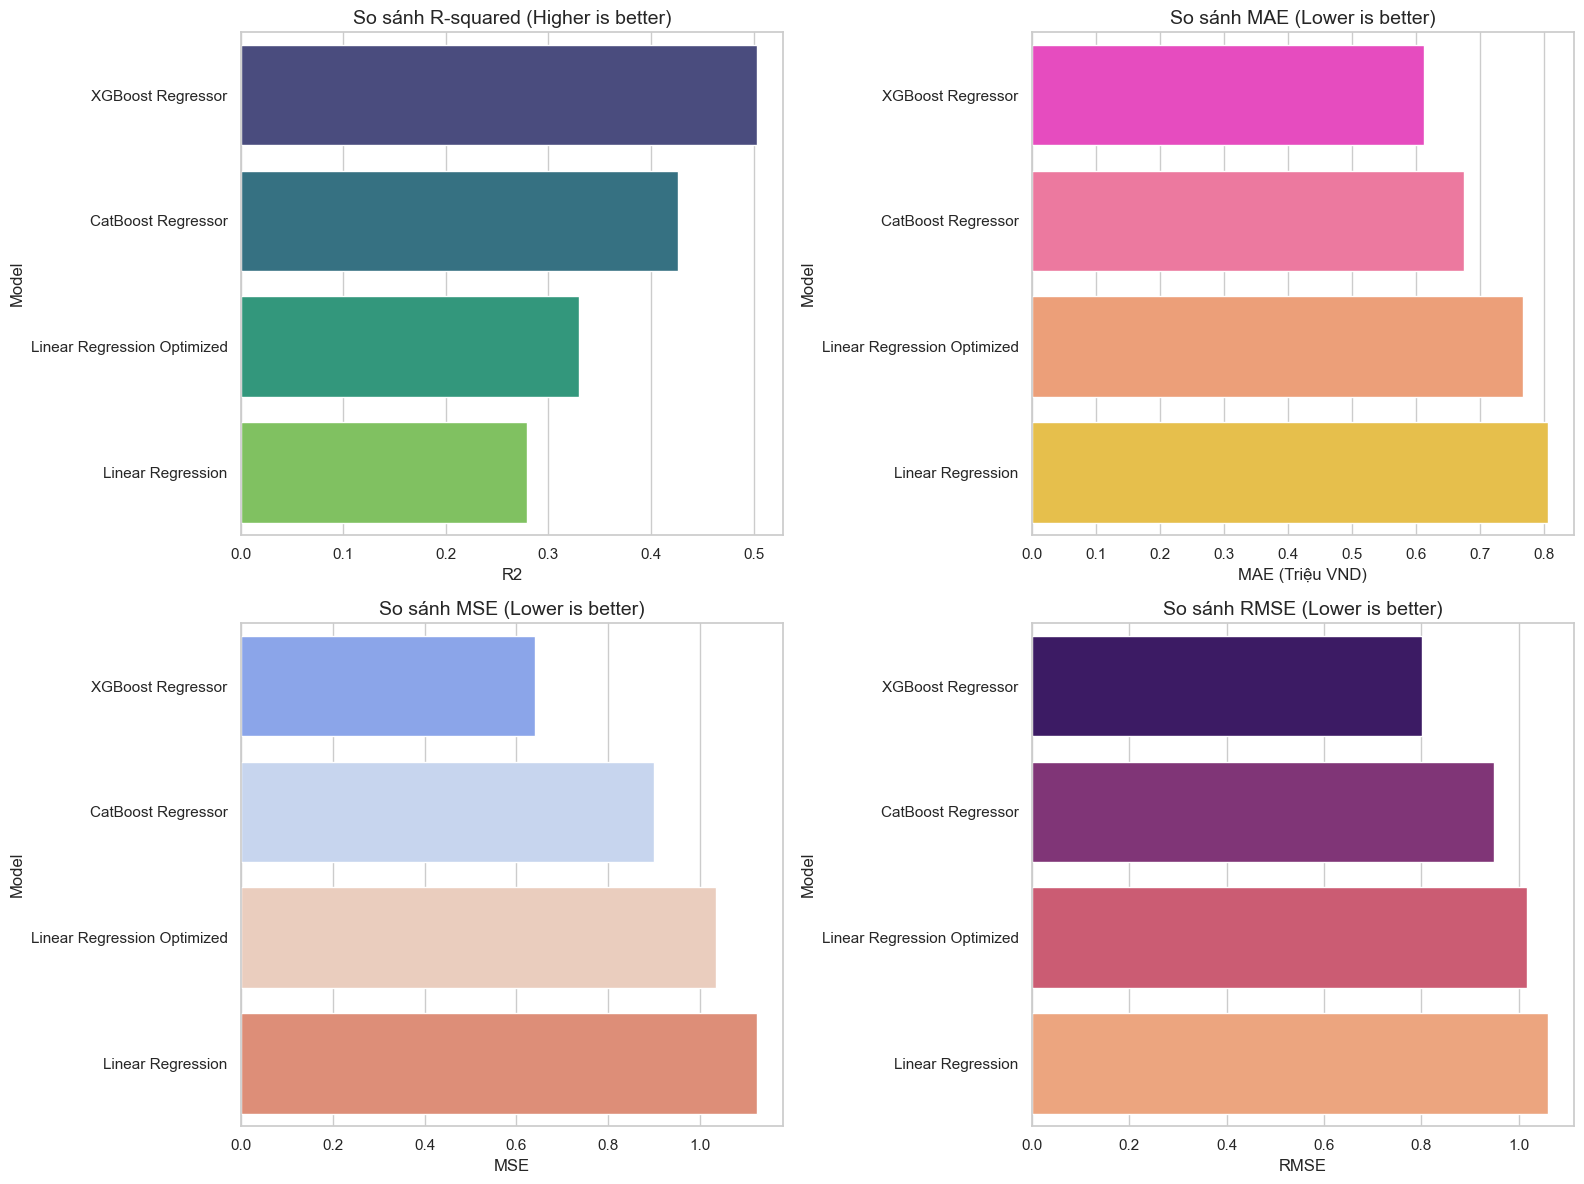

In [25]:
# Thiết lập lưới biểu đồ 2x2 để hiển thị 4 metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Biểu đồ R-squared (Càng cao càng tốt)
sns.barplot(x='R2', y='Model', data=df_results, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('So sánh R-squared (Higher is better)', fontsize=14)

# 2. Biểu đồ MAE (Càng thấp càng tốt - Sai số tuyệt đối trung bình)
sns.barplot(x='MAE (Triệu VND)', y='Model', data=df_results, palette='spring', ax=axes[0, 1])
axes[0, 1].set_title('So sánh MAE (Lower is better)', fontsize=14)

# 3. Biểu đồ MSE (Càng thấp càng tốt - Sai số bình phương trung bình)
sns.barplot(x='MSE', y='Model', data=df_results, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('So sánh MSE (Lower is better)', fontsize=14)

# 4. Biểu đồ RMSE (Càng thấp càng tốt - Căn bậc hai của MSE)
sns.barplot(x='RMSE', y='Model', data=df_results, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('So sánh RMSE (Lower is better)', fontsize=14)

plt.tight_layout()
plt.show()


### **Đánh giá và So sánh Hiệu suất Mô hình (Model Performance Benchmarking)**

Dựa trên kết quả thực nghiệm từ 4 mô hình: **Linear Regression (Baseline)**, **Linear Regression Optimized**, **CatBoost Regressor**, và **XGBoost Regressor**, nhóm thực hiện phân tích so sánh dựa trên 4 chỉ số chính: $R^2$, MAE, MSE và RMSE.

#### **1. Phân tích Chỉ số R-squared ($R^2$) - Mức độ phù hợp**
*(Biểu đồ góc trên bên trái - Càng cao càng tốt)*

* **Nhận xét**: Có sự cải thiện rõ rệt về độ chính xác khi chuyển từ các mô hình tuyến tính sang các mô hình Ensemble (Boosting).
    * **Linear Regression** (Baseline) có hiệu suất thấp nhất ($R^2 \approx 0.28$).
    * **Linear Regression Optimized** có sự cải thiện nhẹ ($R^2 \approx 0.33$) nhờ vào việc xử lý đặc trưng (Feature Engineering), nhưng vẫn chưa đủ tốt.
    * **CatBoost** tạo ra bước nhảy vọt ($R^2 \approx 0.43$).
    * **XGBoost Regressor** đạt hiệu suất cao nhất ($R^2 > 0.50$).
* **Kết luận**: Dữ liệu giá nhà chứa nhiều mối quan hệ phi tuyến tính phức tạp mà các mô hình hồi quy tuyến tính không thể nắm bắt được. Các thuật toán Boosting (đặc biệt là XGBoost) xử lý vấn đề này tốt hơn nhiều.

#### **2. Phân tích Chỉ số Sai số (MAE, MSE, RMSE)**
*(Các biểu đồ còn lại - Càng thấp càng tốt)*

Các chỉ số đo lường lỗi đều cho thấy xu hướng giảm dần (tốt dần lên) tương ứng với độ phức tạp của mô hình.

**a. Mean Absolute Error (MAE)**

* **XGBoost** đạt mức sai số thấp nhất, khoảng **0.61 (Triệu VND)**. Điều này có nghĩa là trung bình, mô hình dự đoán lệch khoảng 610,000 VND so với giá thực tế trên mỗi đơn vị quan sát.
* So với mô hình Linear Regression ban đầu (MAE $\approx 0.8$), XGBoost đã giảm được sai số khoảng **25%**.

**b. Root Mean Squared Error (RMSE)**

* RMSE của **XGBoost** giảm xuống còn khoảng **0.8**, thấp hơn đáng kể so với mức > 1.0 của Linear Regression.
* Việc RMSE giảm mạnh chứng tỏ XGBoost không chỉ dự đoán trung bình tốt hơn mà còn hạn chế được các sai số lớn (outliers) tốt hơn so với các mô hình còn lại.

#### **3. Tổng kết và Lựa chọn Mô hình**

| Mô hình | Xếp hạng | Nhận định |
| :--- | :--- | :--- |
| **XGBoost Regressor** | **#1 (Tốt nhất)** | Vượt trội ở mọi chỉ số. Đây là mô hình được chọn để triển khai cuối cùng. |
| **CatBoost Regressor** | #2 | Hiệu suất khá tốt, đứng thứ 2. Có thể dùng để kết hợp (Stacking) nếu cần cải thiện thêm. |
| **Linear Regression Opt** | #3 | Hiệu quả hơn mô hình gốc nhờ Feature Engineering nhưng không đủ mạnh để bắt các pattern phức tạp. |
| **Linear Regression** | #4 | Chỉ mang tính chất làm mốc tham chiếu (Baseline). |

### **Kết luận**
Nhóm quyết định lựa chọn **XGBoost Regressor** làm mô hình chính thức cho bài toán này. Kết quả thực nghiệm cho thấy đây là thuật toán tối ưu nhất, cân bằng tốt giữa khả năng giải thích biến thiên dữ liệu ($R^2$) và giảm thiểu sai số dự báo thực tế (MAE, RMSE).